In [43]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import isodate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
#2.Load and Explore the dataset
df_file = pd.read_csv('/Users/ankita/Downloads/youtube_channel_real_performance_analytics.csv')

In [47]:
# Preview the dataset
print(df_file.head())

   ID  Video Duration   Video Publish Time  Days Since Publish  Day  Month  \
0   0           201.0  2016-06-02 00:00:00                   0    2      6   
1   1           391.0  2016-06-10 00:00:00                   8   10      6   
2   2           133.0  2016-06-14 00:00:00                   4   14      6   
3   3            14.0  2016-06-29 00:00:00                  15   29      6   
4   4            45.0  2016-07-01 00:00:00                   2    1      7   

   Year Day of Week  Revenue per 1000 Views (USD)  \
0  2016    Thursday                         0.024   
1  2016      Friday                         0.056   
2  2016     Tuesday                         0.014   
3  2016   Wednesday                         0.004   
4  2016      Friday                         0.000   

   Monetized Playbacks (Estimate)  ...  Watched (Not Skipped) (%)  \
0                           723.0  ...                        0.0   
1                           727.0  ...                        0.0   
2    

In [49]:
# Display Information about dataset
print(df_file.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 70 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  364 non-null    int64  
 1   Video Duration                      364 non-null    float64
 2   Video Publish Time                  364 non-null    object 
 3   Days Since Publish                  364 non-null    int64  
 4   Day                                 364 non-null    int64  
 5   Month                               364 non-null    int64  
 6   Year                                364 non-null    int64  
 7   Day of Week                         364 non-null    object 
 8   Revenue per 1000 Views (USD)        364 non-null    float64
 9   Monetized Playbacks (Estimate)      364 non-null    float64
 10  Playback-Based CPM (USD)            364 non-null    float64
 11  CPM (USD)                           364 non-n

In [51]:
# Check for null values
print(df_file.isnull().sum())

ID                         0
Video Duration             0
Video Publish Time         0
Days Since Publish         0
Day                        0
                          ..
Watch Time (hours)         0
Subscribers                0
Estimated Revenue (USD)    0
Impressions                0
Video Thumbnail CTR (%)    0
Length: 70, dtype: int64


In [69]:
# 3.Data Cleaning Handle Missing Values:

df_file['Video Duration'] = df_file['Video Duration'].apply(
    lambda x: isodate.parse_duration(x).total_seconds() if isinstance(x, str) else 0
)
print(df_file[['Video Duration']].head())

   Video Duration
0               0
1               0
2               0
3               0
4               0


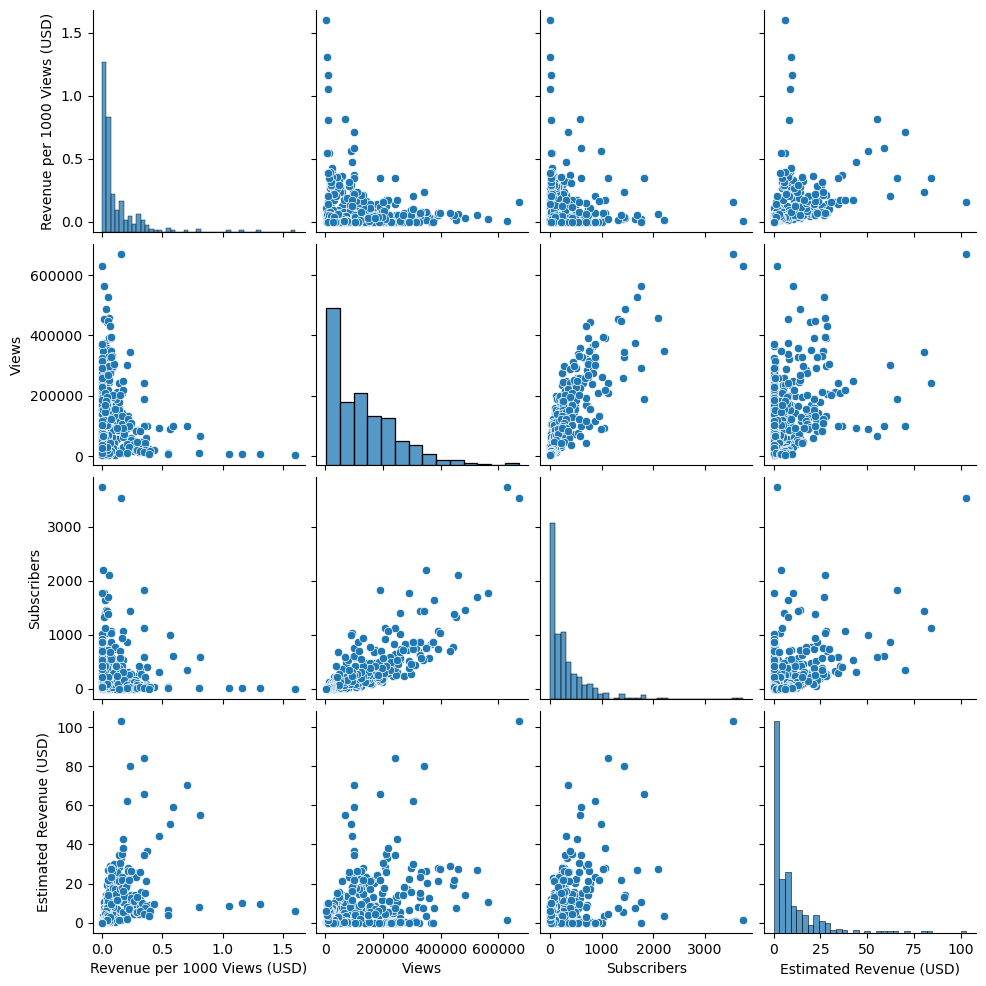

In [79]:
# 4. Exploratory Data Analysis (EDA) Analyze relationships:
# Define correct column names based on actual DataFrame
selected_columns = [
    'Revenue per 1000 Views (USD)',  # Fixed "Views" capitalization
    'Views',
    'Subscribers',  # Fixed plural form
    'Estimated Revenue (USD)'  # Fixed space before "(USD)"
]

# Ensure the selected columns exist in df_file
existing_columns = [col for col in selected_columns if col in df_file.columns]

# If none of the columns exist, raise an error
if not existing_columns:
    raise KeyError("None of the selected columns exist in df_file. Please check column names.")

# Drop rows with missing values in selected columns
df_file = df_file.dropna(subset=existing_columns)

# Convert selected columns to numeric type
df_file[existing_columns] = df_file[existing_columns].apply(pd.to_numeric, errors='coerce')

# Generate the pairplot
sns.pairplot(df_file[existing_columns])
plt.show()


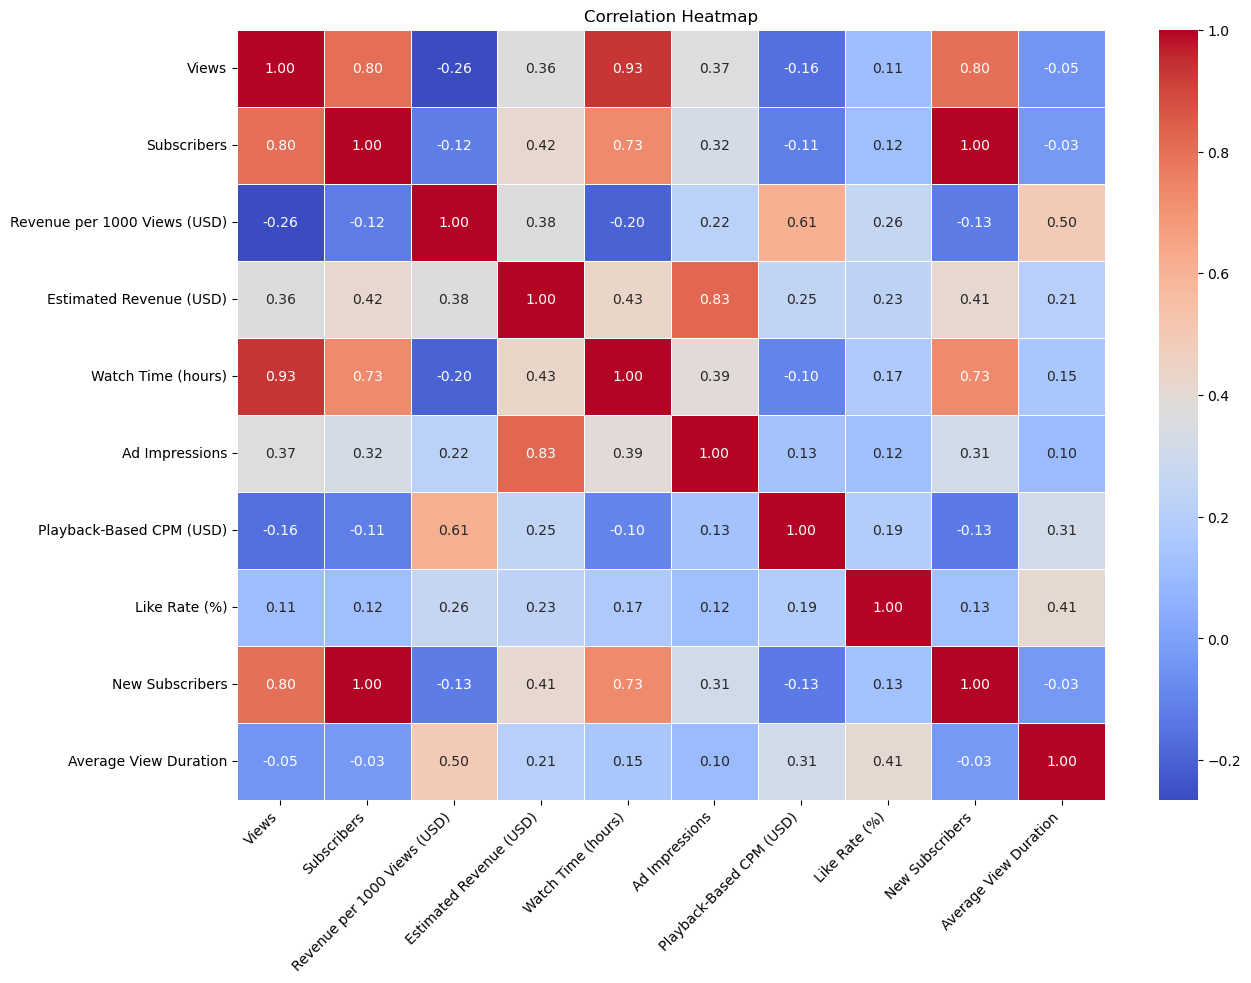

In [85]:
# Correlation Heatmap:
# Select relevant columns to avoid overcrowding
selected_columns = [
    'Views', 'Subscribers', 'Revenue per 1000 Views (USD)', 'Estimated Revenue (USD)', 
    'Watch Time (hours)', 'Ad Impressions', 'Playback-Based CPM (USD)', 
    'Like Rate (%)', 'New Subscribers', 'Average View Duration'
]

# Ensure only existing columns are selected
numeric_df = df_file[[col for col in selected_columns if col in df_file.columns]]

# Plot the correlation heatmap
plt.figure(figsize=(14, 10))  # Increase figure size for better readability
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)  # Keep y-axis labels readable
plt.title("Correlation Heatmap")
plt.show()


In [101]:
# 5. Feature Engineering


# Print actual column names (for debugging)
print("Actual Columns:", df_file.columns.tolist())

# Update the required columns list based on actual column names
required_columns = ['Estimated Revenue (USD)', 'Views', 'Likes', 'Shares', 'New Comments']  # Adjusted from 'Comments'

# Ensure missing columns are created with default values
for col in required_columns:
    if col not in df_file.columns:
        print(f"Warning: {col} not found! Filling with 0s.")
        df_file[col] = 0  # Assign default values

# Replace zero Views with NaN to avoid division errors
df_file['Views'] = df_file['Views'].replace(0, np.nan)

# Create Revenue per View
df_file['Revenue per View'] = df_file['Estimated Revenue (USD)'] / df_file['Views']

# Create Engagement Rate
df_file['Engagement Rate'] = ((df_file['Likes'] + df_file['Shares'] + df_file['New Comments']) / df_file['Views']) * 100

# Fill NaN values with 0 (optional)
df_file[['Revenue per View', 'Engagement Rate']] = df_file[['Revenue per View', 'Engagement Rate']].fillna(0)

# Display the first few rows
print(df_file[['Revenue per View', 'Engagement Rate']].head())

df_file['Revenue per 1000 Views'] = df_file['Revenue per View'] * 1000

Actual Columns: ['ID', 'Video Duration', 'Video Publish Time', 'Days Since Publish', 'Day', 'Month', 'Year', 'Day of Week', 'Revenue per 1000 Views (USD)', 'Monetized Playbacks (Estimate)', 'Playback-Based CPM (USD)', 'CPM (USD)', 'Ad Impressions', 'Estimated AdSense Revenue (USD)', 'DoubleClick Revenue (USD)', 'YouTube Ads Revenue (USD)', 'Watch Page Ads Revenue (USD)', 'YouTube\xa0Premium (USD)', 'Transaction Revenue (USD)', 'Transactions', 'Revenue from Transactions (USD)', 'Reactions', 'Chat Messages Count', 'Reminders Set', 'Stream Hours', 'Remix Views', 'Remix Count', 'Subscribers from Posts', 'New Comments', 'Shares', 'Like Rate (%)', 'Dislikes', 'Likes', 'Unsubscribes', 'New Subscribers', 'Returned Items (USD)', 'Unconfirmed Commissions (USD)', 'Approved Commissions (USD)', 'Orders', 'Total Sales Volume (USD)', 'End Screen Click-Through Rate (%)', 'End Screen Impressions', 'End Screen Clicks', 'Teaser Click-Through Rate (%)', 'Teaser Impressions', 'Teaser Clicks', 'Card Click-T

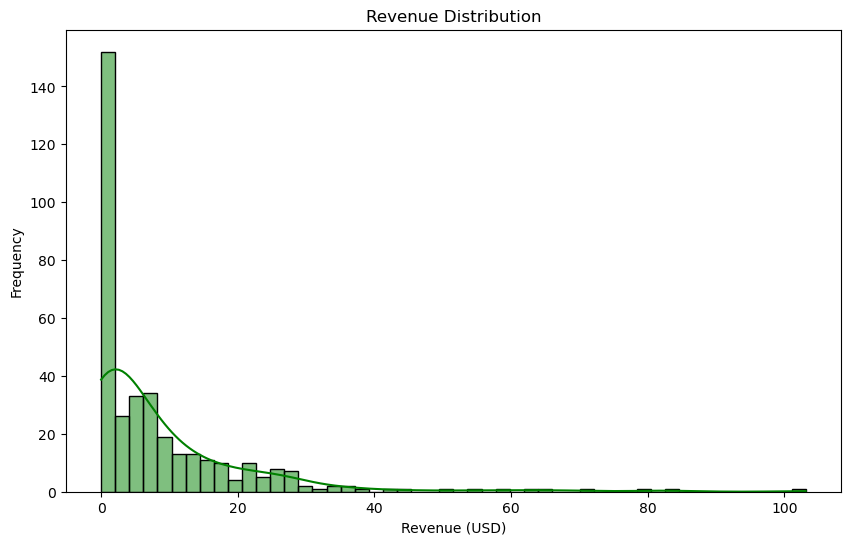

In [103]:
#6. Data Visualization 
# revenue Distribution:
plt.figure(figsize=(10,6))
sns.histplot(df_file['Estimated Revenue (USD)'], bins=50,
kde=True, color=
'green')
plt.title("Revenue Distribution")
plt.xlabel("Revenue (USD)")
plt.ylabel("Frequency")
plt.show()


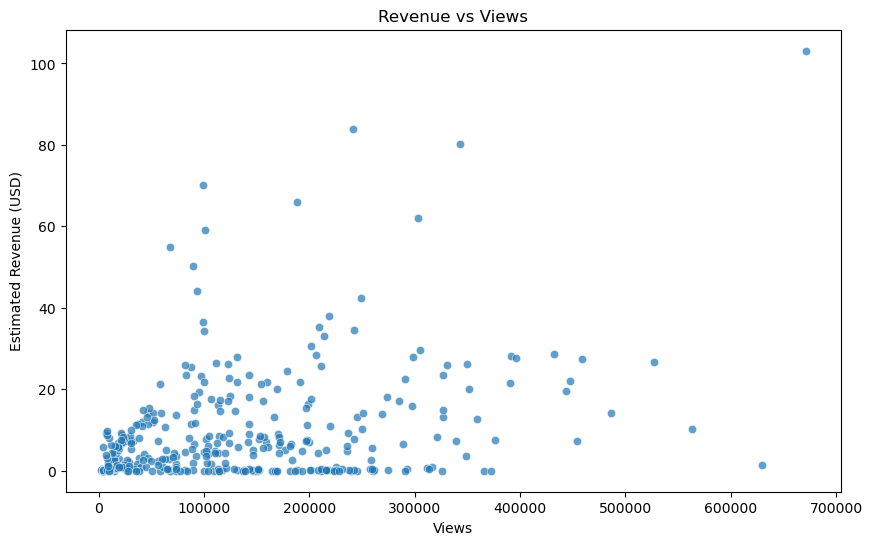

In [111]:
#Revenue vs Views:
# Scatter Plot: Revenue vs Views
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_file['Views'], y=df_file['Estimated Revenue (USD)'], alpha=0.7)
plt.title("Revenue vs Views")
plt.xlabel("Views")
plt.ylabel("Estimated Revenue (USD)")
plt.show()

In [115]:
# 7. Predictive Model:Estimate Revenue 
# Define features and target
features = ['Views', 'Subscribers', 'Likes', 'Shares', 'New Comments', 'Engagement Rate']
target = 'Estimated Revenue (USD)'  # Define the target variable

# Ensure all selected columns exist in df_file
for col in features + [target]:
    if col not in df_file.columns:
        print(f"Warning: {col} not found in DataFrame! Filling with 0s.")
        df_file[col] = 0  # Assign default values

# Select features and target
X = df_file[features]
y = df_file[target]

# Split the data into training & testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of datasets
print(f"X_train Shape: {X_train.shape}, X_test Shape: {X_test.shape}")
print(f"y_train Shape: {y_train.shape}, y_test Shape: {y_test.shape}")

X_train Shape: (291, 6), X_test Shape: (73, 6)
y_train Shape: (291,), y_test Shape: (73,)


In [117]:
#Train Random Forest Regressor:
model = RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train, y_train)
# Predict on test data
y_pred = model.predict(X_test)


#Evaluate the Model:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 75.51
R-squared: 0.13


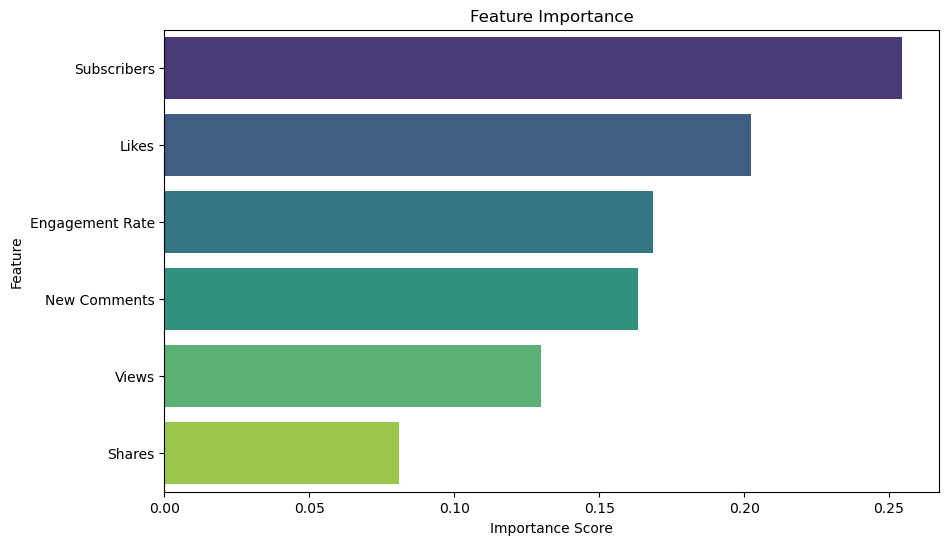

In [123]:
# 8.Insight and Recommendation 

# Train a model first (Random Forest)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)  # Ensure X_train and y_train are defined

# Get feature importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort feature importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance (Fixing the warning)
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', hue='Feature', legend=False, palette='viridis')
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


In [127]:
#9. Deployment and Presentation
import joblib

# Save the trained model
joblib.dump(model, 'youtube_revenue_predictor.pkl')

print("Model saved successfully!")

Model saved successfully!
